In [115]:
import numpy as np
import xarray as xr
import glob
import os
import cfgrib



In [116]:
#files = 'Z:\data\v3.6a\daily'

In [117]:
#files = glob.glob(f"Z:\\data\\v3.6a\\daily\\1989\\*")


In [118]:
path = os.getcwd()
home_path = os.path.dirname(path)
data_folder = f'{home_path}\\Data'

In [119]:
files = glob.glob(f"{data_folder}\\E\\*")
files

['C:\\Users\\anne-\\OneDrive - Delft University of Technology\\Documenten\\Environmental Engineering MSc\\ENVM1502-Catchment-model\\Data\\E\\adaptor.mars.internal-1680592080.5311086-6141-18-2bb58ddc-71bc-4669-a9cd-4e31de0f1a65.grib',
 'C:\\Users\\anne-\\OneDrive - Delft University of Technology\\Documenten\\Environmental Engineering MSc\\ENVM1502-Catchment-model\\Data\\E\\adaptor.mars.internal-1680592080.5311086-6141-18-2bb58ddc-71bc-4669-a9cd-4e31de0f1a65.grib.923a8.idx',
 'C:\\Users\\anne-\\OneDrive - Delft University of Technology\\Documenten\\Environmental Engineering MSc\\ENVM1502-Catchment-model\\Data\\E\\adaptor.mars.internal-1680602386.1701012-8965-6-e4b7b0e9-8928-4fa0-a4d2-6648c4dd101f.grib',
 'C:\\Users\\anne-\\OneDrive - Delft University of Technology\\Documenten\\Environmental Engineering MSc\\ENVM1502-Catchment-model\\Data\\E\\adaptor.mars.internal-1680602386.1701012-8965-6-e4b7b0e9-8928-4fa0-a4d2-6648c4dd101f.grib.923a8.idx',
 'C:\\Users\\anne-\\OneDrive - Delft Universit

In [120]:
# Import data
grib_data = cfgrib.open_datasets(files[2])

In [121]:
grib_data_array = grib_data[0]
grib_data_array

<xarray.Dataset>
Dimensions:     (time: 9497, step: 12, latitude: 21, longitude: 25)
Coordinates:
    number      int32 0
  * time        (time) datetime64[ns] 2009-12-31T18:00:00 ... 2022-12-31T18:0...
  * step        (step) timedelta64[ns] 01:00:00 02:00:00 ... 11:00:00 12:00:00
    surface     float64 0.0
  * latitude    (latitude) float64 45.0 44.75 44.5 44.25 ... 40.5 40.25 40.0
  * longitude   (longitude) float64 -76.0 -75.75 -75.5 ... -70.5 -70.25 -70.0
    valid_time  (time, step) datetime64[ns] ...
Data variables:
    pev         (time, step, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts

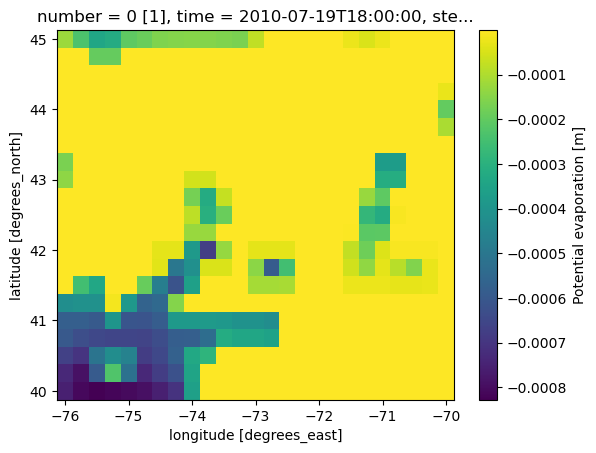

In [148]:
grib_data_array.isel(time=400,step=1).pev.plot()

In [109]:
df_evap = grib_data_array.sel(latitude=40,longitude=-73,method='nearest').pev.to_pandas()

In [110]:
# df_evap_mm = df_evap.pev * 1000
# df_evap_mm.groupby(by='time').sum()

In [111]:
df_sum = df_evap.sum(axis=1).to_frame()

In [112]:
df_evap_mm = df_sum.resample('d').sum() * 1000

<Axes: xlabel='time'>

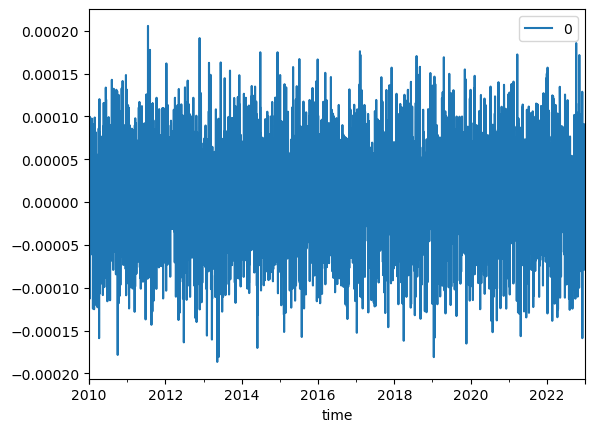

In [113]:
df_evap_mm.plot()

In [176]:
halfday_evap = []
for i in range(len(grib_data_array.time)):
    if i == 10:
        break
    halfday = []
    for j in range(len(grib_data_array.step)):
        avg = grib_data_array.isel(time=i, step=j).pev.values.mean()
        halfday.append(avg)
    halfday_evap.append(halfday)

In [177]:
daily_sum = []
day = []
for i in range(1, len(halfday_evap)): 
    day += halfday_evap[i]
    if i % 2 == 0:
        
        daily_sum.append(sum(day) * 1000)
        day = []
        
        
    
    

In [169]:
grib_data_array.isel(time=1,step=2).pev.mean()

<xarray.DataArray 'pev' ()>
array(-7.585613e-07, dtype=float32)
Coordinates:
    number      int32 0
    time        datetime64[ns] 2010-01-01T06:00:00
    step        timedelta64[ns] 03:00:00
    surface     float64 0.0
    valid_time  datetime64[ns] ...